In [4]:
import pandas as pd
import numpy as n
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [61]:
df=pd.DataFrame({'x':[12,20,28,18,29,33,24,45,45,52,51,52,55,53,55,61,64,69,72],
                 'y':[39,36,30,52,54,46,55,59,63,70,66,63,58,23,14,8,19,7,24]
})

In [62]:
n.random.seed(200)
k=3
centroids={i+1:[n.random.randint(0,80),n.random.randint(0,80)]
          for i in range(k)
          }
print(centroids)

{1: [26, 16], 2: [68, 42], 3: [55, 76]}


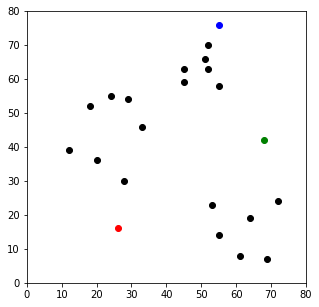

In [63]:
fig=plt.figure(figsize=(5,5))
plt.scatter(df['x'],df['y'],color='k')
colmap={1:'r',2:'g',3:'b'}
for i in centroids.keys():
    plt.scatter(*centroids[i],color=colmap[i])
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()

In [64]:
def assignment(df,centroids):
    for i in centroids.keys():
        df['distance_from_{}'.format(i)]=(
            n.sqrt(
                (df['x']-centroids[i][0])**2 + (df['y']-centroids[i][1])**2)
        )
    centroid_distance_cols =['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest']=df.loc[:,centroid_distance_cols].idxmin(axis=1) 
    df['closest']=df['closest'].map(lambda x:int(x.lstrip('distance_from_')))
    df['color']=df['closest'].map(lambda x:colmap[x])
    return df

In [65]:
df=assignment(df,centroids)
print(df.head())


    x   y  distance_from_1  distance_from_2  distance_from_3  closest color
0  12  39        26.925824        56.080300        56.727418        1     r
1  20  36        20.880613        48.373546        53.150729        1     r
2  28  30        14.142136        41.761226        53.338541        1     r
3  18  52        36.878178        50.990195        44.102154        1     r
4  29  54        38.118237        40.804412        34.058773        3     b


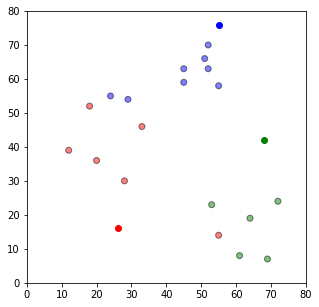

In [66]:
fig=plt.figure(figsize=(5,5))
plt.scatter(df['x'],df['y'],color=df['color'],alpha=0.5,edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i],color=colmap[i])
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()

In [67]:
import copy

In [68]:
old_centroids=copy.deepcopy(centroids)

In [69]:
def update(k):
    for i in centroids.keys():
        centroids[i][0]=n.mean(df[df['closest']==i]['x'])
        centroids[i][1]=n.mean(df[df['closest']==i]['y'])
    return k    

In [70]:
centroids=update(centroids)
print(centroids)

{1: [27.666666666666668, 36.166666666666664], 2: [63.8, 16.2], 3: [44.125, 61.0]}


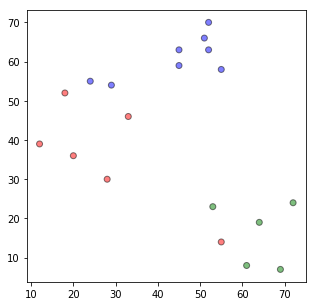

In [71]:
fig=plt.figure(figsize=(5,5))
ax=plt.axes()
plt.scatter(df['x'],df['y'],color=df['color'],alpha=0.5,edgecolor='k')

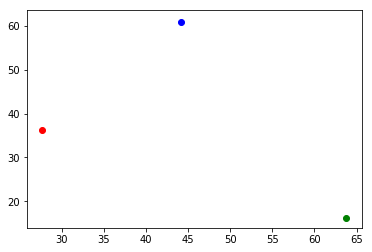

In [72]:
for i in centroids.keys():
    plt.scatter(*centroids[i],color=colmap[i])

(0, 80)

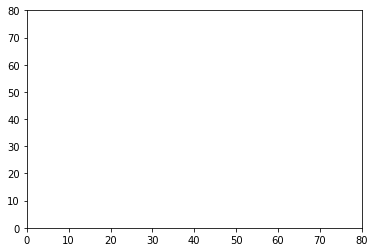

In [73]:
plt.xlim(0,80)
plt.ylim(0,80)

In [74]:
for i in old_centroids.keys():
    old_x=old_centroids[i][0]
    old_y=old_centroids[i][1]
    dx=(centroids[i][0]-old_centroids[i][0])*0.75
    dy=(centroids[i][1]-old_centroids[i][1])*0.75
    ax.arrow(old_x,old_y,dx,dy,head_width=2,head_length=3,fc=colmap[i],ec=colmap[i])

In [75]:
plt.show()

In [76]:
df=assignment(df,centroids)

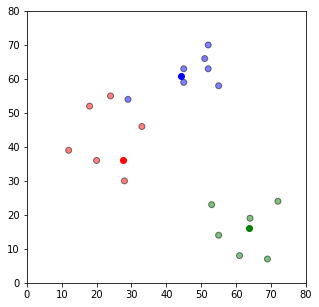

In [77]:
fig=plt.figure(figsize=(5,5))
plt.scatter(df['x'],df['y'],color=df['color'],alpha=0.5,edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i],color=colmap[i])
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()

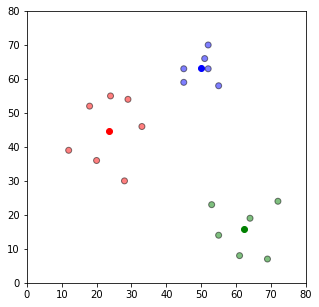

In [79]:
fig=plt.figure(figsize=(5,5))
plt.scatter(df['x'],df['y'],color=df['color'],alpha=0.5,edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i],color=colmap[i])
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()

In [78]:
while True:
    closest_centroids=df['closest'].copy(deep=True)
    centroids=update(centroids)
    df=assignment(df,centroids)
    if closest_centroids.equals(df['closest']):
        break

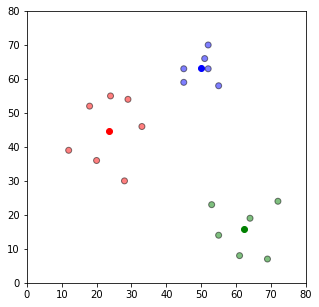

In [80]:
fig=plt.figure(figsize=(5,5))
plt.scatter(df['x'],df['y'],color=df['color'],alpha=0.5,edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i],color=colmap[i])
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()